## 权重衰退

In [1]:
import torch
from torch import nn
import My_utils

### 生成数据集和参数的初始值

In [2]:
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones((num_inputs,1))*0.01,0.05
train_data=My_utils.generate_synthetic_data(true_w,true_b,n_train)
train_iter=My_utils.load_array(train_data,batch_size=batch_size)
test_data=My_utils.generate_synthetic_data(true_w,true_b,n_test)
test_iter=My_utils.load_array(test_data,batch_size=batch_size,is_Train=False)

def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]

def L2_penalty(w):
    return torch.sum(w.pow(2))/2

### 定义网络、损失函数、训练方法

In [3]:
def train(lambd):#L2范数的参数
    w,b=init_params()
    net,loss=lambda X:My_utils.LinearRegression(X,w,b),My_utils.squared_loss
    num_epochs,lr=100,0.003
    animator=My_utils.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train_loss','test_loss'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l=loss(net(X),y)+lambd*L2_penalty(w)
            l.sum().backward()
            My_utils.sgd([w,b],lr,batch_size)
        if (epoch+1)%5==0:
            animator.add(epoch+1,(My_utils.evaluate_loss(net,train_iter,loss),
                                  My_utils.evaluate_loss(net,test_iter,loss)))
    print(torch.norm(w).item())# .item可以取出高精度的数字

### 训练

13.154664993286133


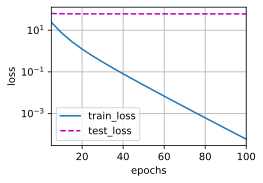

In [4]:
train(0)

0.357372522354126


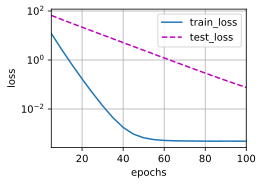

In [5]:
train(3)

In [6]:
def train_concise(weight_decay):
    net=nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss=nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer=torch.optim.SGD([
        {'params':net[0].weight,'weight_decay':weight_decay},
        {'params':net[0].bias}],
        lr=lr
    )
    animator=My_utils.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train_loss','test_loss'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l=loss(net(X),y)
            l.mean().backward()
            trainer.step()
        if (epoch+1)%5==0:
            animator.add(epoch+1,(My_utils.evaluate_loss(net,train_iter,loss),
                                  My_utils.evaluate_loss(net,test_iter,loss)))
    print(torch.norm(net[0].weight).item())# .item可以取出高精度的数字

13.255010604858398


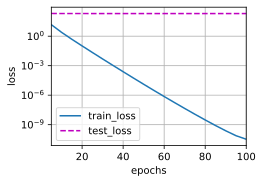

In [7]:
train_concise(0)

0.4300514757633209


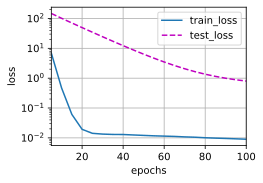

In [8]:
train_concise(3)